In [1545]:
import pandas as pd


def get_stratified_subset(df, label_column, num_examples_per_label, random_state=None):
    """
    Returns a stratified subset of the dataframe with a fixed number of examples for each label.

    Args:
        df (pd.DataFrame): The input dataframe.
        label_column (str): The name of the column containing the labels.
        num_examples_per_label (int): The fixed number of examples to sample for each label.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A stratified subset of the dataframe.
    """
    if random_state is not None:
        np.random.seed(random_state)

    stratified_subset = []

    for label in df[label_column].unique():
        label_group = df[df[label_column] == label]
        if len(label_group) < num_examples_per_label:
            raise ValueError(f"Not enough examples for label '{label}'. Requested {num_examples_per_label}, but only {len(label_group)} available.")
        
        sampled_group = label_group.sample(n=num_examples_per_label, random_state=random_state)
        stratified_subset.append(sampled_group)

    return pd.concat(stratified_subset).reset_index(drop=True)
def concatenate_dataframes(dfs):
    """
    Concatenates a list of DataFrames based on the 'filename' column as the ID.
    Drops the 'Prediction' column from each DataFrame and returns all column names except 'filename'.

    Parameters:
        dfs (list): List of pandas DataFrames to concatenate. Each must have a 'filename' column.

    Returns:
        pd.DataFrame: A single DataFrame with merged data.
        list: List of all column names excluding 'filename'.
    """
    if not dfs:
        raise ValueError("The list of DataFrames is empty.")

    for df in dfs:
        if 'Filename' not in df.columns:
            raise ValueError("Each DataFrame must contain a 'filename' column.")

    # Drop 'Prediction' column from each DataFrame if it exists
    dfs = [df.drop(columns=['Prediction'], errors='ignore') for df in dfs]

    # Start with the first DataFrame
    result = dfs[0].copy()
    
    for idx, df in enumerate(dfs[1:], start=1):
        # Rename columns to add a suffix except for 'filename'
        renamed_df = df.rename(columns={col: f"{col}_exp{idx}" for col in df.columns if col != 'Filename'})
        
        # Merge with the existing result
        result = pd.merge(result, renamed_df, on='Filename', how='outer')

    # Get all column names except 'filename'
    column_names = [col for col in result.columns if col != 'Filename']

    return result, column_names

In [1471]:
import pandas as pd
import numpy as np

In [1546]:
experiments_list = [
    'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4',
    # 'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_focalloss',
    # 'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_batchbalanced',
    # 'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_batchbalanced_focaloss',
    'multimodalmodel_w2v2robust_robertalarge_lazyload_lr1e4',
    'multimodalmodel_hubertxlarge_robertalarge_lazyload_lr1e4',
    'multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4',
    # "multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4_focaloss",
    # "multimodalmodel_whisperlarge_w2v2xls_lazyload_lr1e4",
    'multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4',
    # "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_focaloss",
    # "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_focaloss_gamma3"
    "multimodalmodel_whisperlarge_debertaxxlarge_lazyload_lr1e5_lasthidden"
]

dfs = []
dfs_val = []
for exp in experiments_list:
    dfs.append(pd.read_csv(f'../experiments/{exp}/results/train.csv'))
    dfs_val.append(pd.read_csv(f'../experiments/{exp}/results/dev.csv'))
# preds.head()

In [1547]:
cols

['class_0_prob',
 'class_1_prob',
 'class_2_prob',
 'class_3_prob',
 'class_4_prob',
 'class_5_prob',
 'class_6_prob',
 'class_7_prob',
 'class_0_prob_exp1',
 'class_1_prob_exp1',
 'class_2_prob_exp1',
 'class_3_prob_exp1',
 'class_4_prob_exp1',
 'class_5_prob_exp1',
 'class_6_prob_exp1',
 'class_7_prob_exp1',
 'class_0_prob_exp2',
 'class_1_prob_exp2',
 'class_2_prob_exp2',
 'class_3_prob_exp2',
 'class_4_prob_exp2',
 'class_5_prob_exp2',
 'class_6_prob_exp2',
 'class_7_prob_exp2',
 'class_0_prob_exp3',
 'class_1_prob_exp3',
 'class_2_prob_exp3',
 'class_3_prob_exp3',
 'class_4_prob_exp3',
 'class_5_prob_exp3',
 'class_6_prob_exp3',
 'class_7_prob_exp3',
 'class_0_prob_exp4',
 'class_1_prob_exp4',
 'class_2_prob_exp4',
 'class_3_prob_exp4',
 'class_4_prob_exp4',
 'class_5_prob_exp4',
 'class_6_prob_exp4',
 'class_7_prob_exp4',
 'class_0_prob_exp5',
 'class_1_prob_exp5',
 'class_2_prob_exp5',
 'class_3_prob_exp5',
 'class_4_prob_exp5',
 'class_5_prob_exp5',
 'class_6_prob_exp5',
 'clas

In [1548]:
preds, cols = concatenate_dataframes(dfs)
preds_val, _ = concatenate_dataframes(dfs_val)

In [1549]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_6_prob_exp4,class_7_prob_exp4,class_0_prob_exp5,class_1_prob_exp5,class_2_prob_exp5,class_3_prob_exp5,class_4_prob_exp5,class_5_prob_exp5,class_6_prob_exp5,class_7_prob_exp5
0,MSP-PODCAST_0003_0052.wav,-2.6094,-1.5741,0.5319,-0.7780,-2.4081,-0.3807,0.9646,1.5363,-0.9920,...,0.7406,1.6452,-1.8473,-0.7090,0.7013,-0.0453,-0.6979,-0.5635,0.7584,1.3781
1,MSP-PODCAST_0003_0084.wav,-5.0658,2.0820,-0.2486,-1.3754,-1.5839,-4.0328,-1.2956,2.2646,-2.2851,...,-0.0835,2.0147,-3.1914,2.7650,-0.0990,-0.6732,-0.3002,-1.2726,-0.1841,2.5666
2,MSP-PODCAST_0003_0086.wav,-4.4962,2.8279,-0.3850,-1.2710,-0.9462,-3.1940,-1.7564,1.6332,-2.3826,...,-0.9473,2.1501,-2.9516,4.6548,-0.5516,-0.7974,0.9763,-1.5131,-1.1026,2.1649
3,MSP-PODCAST_0003_0106.wav,-2.2321,3.0808,-2.4715,-2.6153,-4.1133,-2.4933,-0.9217,0.4628,-0.7892,...,0.4374,0.4935,-2.1015,2.2953,-1.0060,-1.5412,-0.3874,0.4243,0.3829,0.1693
4,MSP-PODCAST_0003_0113.wav,-0.9049,1.1925,-1.4834,-0.6667,-1.1839,-0.0835,-0.1204,-0.0076,-1.9102,...,0.1043,0.7801,-1.3113,1.0971,-1.0805,0.7464,0.7365,-0.2862,0.0743,1.1663


In [1550]:
classes_ = ['A', 'S', 'H', 'U', 'F', 'D', 'C', 'N']

map_idx = dict()
for i, c in enumerate(classes_):
    map_idx[c] = i

map_argmax = dict()
for i, c in enumerate(classes_):
    map_argmax[i] = c

In [1551]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [1552]:
# Just saving the auxiliardataset

In [1553]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

preds_val['FileName'] = preds_val['Filename']
preds_val = preds_val.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

In [1554]:
preds['target'] = preds['EmoClass'].map(map_idx)
preds_val['target'] = preds_val['EmoClass'].map(map_idx)

In [1555]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_3_prob_exp5,class_4_prob_exp5,class_5_prob_exp5,class_6_prob_exp5,class_7_prob_exp5,FileName,EmoClass,Gender,SpkrID,target
0,MSP-PODCAST_0003_0052.wav,-2.6094,-1.5741,0.5319,-0.7780,-2.4081,-0.3807,0.9646,1.5363,-0.9920,...,-0.0453,-0.6979,-0.5635,0.7584,1.3781,MSP-PODCAST_0003_0052.wav,N,Male,3,7
1,MSP-PODCAST_0003_0084.wav,-5.0658,2.0820,-0.2486,-1.3754,-1.5839,-4.0328,-1.2956,2.2646,-2.2851,...,-0.6732,-0.3002,-1.2726,-0.1841,2.5666,MSP-PODCAST_0003_0084.wav,N,Male,3,7
2,MSP-PODCAST_0003_0086.wav,-4.4962,2.8279,-0.3850,-1.2710,-0.9462,-3.1940,-1.7564,1.6332,-2.3826,...,-0.7974,0.9763,-1.5131,-1.1026,2.1649,MSP-PODCAST_0003_0086.wav,N,Male,3,7
3,MSP-PODCAST_0003_0106.wav,-2.2321,3.0808,-2.4715,-2.6153,-4.1133,-2.4933,-0.9217,0.4628,-0.7892,...,-1.5412,-0.3874,0.4243,0.3829,0.1693,MSP-PODCAST_0003_0106.wav,S,Male,3,1
4,MSP-PODCAST_0003_0113.wav,-0.9049,1.1925,-1.4834,-0.6667,-1.1839,-0.0835,-0.1204,-0.0076,-1.9102,...,0.7464,0.7365,-0.2862,0.0743,1.1663,MSP-PODCAST_0003_0113.wav,N,Male,3,7


In [1556]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [1557]:
preds_estrat = get_stratified_subset(preds, 'EmoClass', 300, random_state=42)

In [1558]:
# preds_estrat

In [1559]:
# # Just saving the auxiliardataset
# filenames = preds_estrat.FileName

# tmp = pd.read_csv("../benchmark/processed_labels.csv")

In [1560]:
# tmp = tmp[tmp['FileName'].isin(filenames)].reset_index(drop=True)
# tmp.shape

In [1561]:
# tmp.to_csv("train_stacking_sample.csv")

In [1562]:
# tmp.head()

In [1563]:
preds_estrat.EmoClass.value_counts()

EmoClass
N    300
S    300
D    300
H    300
A    300
C    300
F    300
U    300
Name: count, dtype: int64

In [1564]:
preds_estrat.Gender.value_counts()

Gender
Male      1375
Female    1025
Name: count, dtype: int64

In [1597]:
lr = LogisticRegression(random_state = 42, max_iter = 500, C=1,  multi_class='ovr', penalty='l2')
# lr = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 13, min_samples_leaf=5)
# lr = SVC(random_state = 42, C = 1, kernel='rbf', gamma = 'scale')

lr.fit(preds_estrat[cols], preds_estrat['target'])

LogisticRegression(C=1, max_iter=500, multi_class='ovr', random_state=42)

In [1598]:
preds_val['Prediction'] = lr.predict(preds_val[cols])
preds_val['Prediction'] = preds_val['Prediction'].map(map_argmax) 

preds_estrat['Prediction'] = lr.predict(preds_estrat[cols])
preds_estrat['Prediction'] = preds_estrat['Prediction'].map(map_argmax) 

In [1599]:
preds_val.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp5,class_5_prob_exp5,class_6_prob_exp5,class_7_prob_exp5,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_0002_0033.wav,-1.4179,-0.5863,-0.6701,0.4331,0.7907,-0.5375,-0.6574,-0.1280,-2.2422,...,0.4979,-0.4059,-0.0991,0.9611,MSP-PODCAST_0002_0033.wav,N,Female,127,7,F
1,MSP-PODCAST_0002_0039.wav,-1.7175,-1.5450,0.5750,0.1468,0.0169,-1.1929,-0.1427,0.7643,-1.0855,...,0.1974,-0.7204,0.6862,0.7643,MSP-PODCAST_0002_0039.wav,N,Female,127,7,F
2,MSP-PODCAST_0002_0051.wav,-1.0199,-0.4363,0.2057,-0.1570,-0.3987,-0.7670,0.0676,0.5444,-1.0831,...,-0.4175,-0.7772,0.4548,1.5647,MSP-PODCAST_0002_0051.wav,N,Female,127,7,N
3,MSP-PODCAST_0002_0061.wav,-1.4278,-0.1977,-0.6342,-0.0041,0.6755,-0.3612,0.4292,0.1391,-0.6702,...,-0.1470,-0.6059,0.9237,0.1661,MSP-PODCAST_0002_0061.wav,F,Female,128,4,C
4,MSP-PODCAST_0006_0017.wav,-2.1206,0.4019,-0.5818,0.1007,0.5471,-0.2179,-0.0455,0.4408,-2.7826,...,-0.7302,-0.8533,0.2037,1.9450,MSP-PODCAST_0006_0017.wav,N,Female,127,7,N


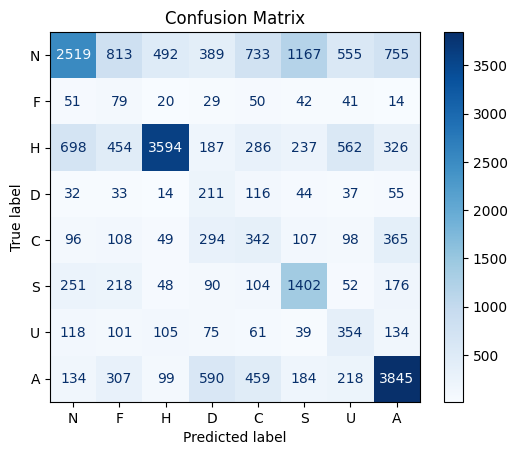

In [1612]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds_val['EmoClass'], preds_val['Prediction'], labels=preds_val['EmoClass'].unique())

# Display labels
labels = preds_val['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [1613]:
preds_subset = get_stratified_subset(preds_val, 'EmoClass', 100)
preds_subset.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp5,class_5_prob_exp5,class_6_prob_exp5,class_7_prob_exp5,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_2421_0197.wav,-1.0402,1.2595,-3.3509,-1.5075,-0.5826,-0.4437,-0.8148,-0.9488,-0.6344,...,-0.8465,-0.3264,0.5793,-0.8662,MSP-PODCAST_2421_0197.wav,N,Female,210,7,S
1,MSP-PODCAST_2347_1004.wav,2.9500,-2.9352,-2.7740,-1.2526,-2.7135,-0.2511,0.8370,-1.8347,0.6139,...,-0.4108,1.9916,1.7639,-2.6662,MSP-PODCAST_2347_1004.wav,N,Female,210,7,A
2,MSP-PODCAST_3406_0004_0003.wav,-1.3348,0.2684,0.0360,-0.7542,-0.5391,-2.3222,-1.0530,0.2348,-1.6166,...,-0.6445,-2.0456,-0.2022,0.7619,MSP-PODCAST_3406_0004_0003.wav,N,Male,1767,7,S
3,MSP-PODCAST_0807_1720.wav,-2.4486,-4.0463,1.6285,2.0042,-1.8934,-1.6830,-0.0103,0.7909,-2.0340,...,-1.7131,0.0576,0.6348,0.2517,MSP-PODCAST_0807_1720.wav,N,Male,97,7,U
4,MSP-PODCAST_3079_1429.wav,-5.1446,0.9643,-0.3314,0.0405,-0.9966,-2.5701,-1.0628,2.7509,-2.5888,...,-0.4531,-1.6025,-0.9730,2.3553,MSP-PODCAST_3079_1429.wav,N,Male,2261,7,N


# Training bootstrap

In [1614]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_estrat, 'EmoClass', 100, i)
    f1_scores.append(f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro'))

In [1615]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.5583195637738286, 0.0, 0.5583195637738286, 0.5583195637738286)

In [1616]:
f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro')

0.5583195637738286

In [1617]:
accuracy_score(preds_estrat['EmoClass'], preds_estrat['Prediction'])

0.5616666666666666

# Dev bootstrap

In [1618]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_val, 'EmoClass', 200, i)
    f1_scores.append(f1_score(preds_subset['EmoClass'], preds_subset['Prediction'], average='macro'))

In [1619]:
# f1_scores

In [1620]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.41577636606487545,
 0.010069686631523524,
 0.4319973685059653,
 0.385178087728379)

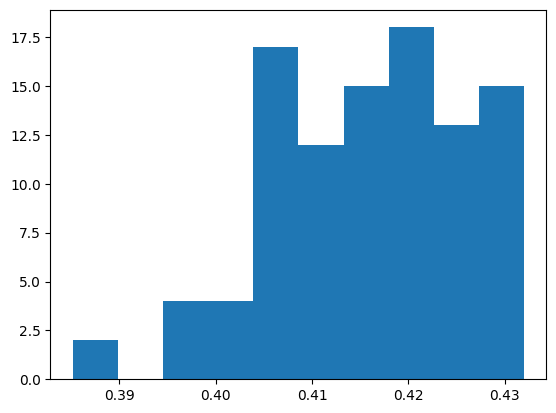

In [1621]:
plt.hist(f1_scores, bins=10)
plt.show()

In [1622]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='macro')

0.3698079174403634

In [1623]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='micro')

0.4887956291076095

In [1624]:
accuracy_score(preds_val['EmoClass'], preds_val['Prediction'])

0.4887956291076095

In [1625]:
f1_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'], average='macro')

0.33588174059786857

In [1626]:
f1_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'], average='macro')

0.3948580565978267

In [1596]:
accuracy_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'])

0.4027069783793285

In [1544]:
accuracy_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'])

0.5362391930835735

In [1424]:
for e in preds['EmoClass'].unique():
    acc = accuracy_score(preds_val[preds_val['EmoClass']==e]['EmoClass'], preds_val[preds_val['EmoClass']==e]['Prediction'])
    print(f'Emotion {e} acc = {acc}')

Emotion N acc = 0.3258790246531052
Emotion S acc = 0.5950448526270824
Emotion D acc = 0.3966789667896679
Emotion H acc = 0.5517023959646911
Emotion A acc = 0.6519876627827279
Emotion C acc = 0.22960932145305005
Emotion F acc = 0.22699386503067484
Emotion U acc = 0.342451874366768


In [1425]:
preds_val.EmoClass.value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

In [1426]:
preds_val.Prediction.value_counts(normalize=True)

Prediction
A    0.219970
H    0.171550
N    0.147478
S    0.127484
C    0.096999
F    0.081677
D    0.077797
U    0.077045
Name: proportion, dtype: float64

In [1306]:
import joblib

# Save to a file
# joblib.dump(lr, '../submissions/random_forest_model_stackingv1.pkl')

['../submissions/random_forest_model_stackingv1.pkl']